In [5]:
import qubic.toolchain as _tc
import qubic.rpc_client as _rc
import qubitconfig.qchip as _qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.cross_resonance as _xr
from importlib import reload
import qubic.state_disc as _sd
import chipcalibration.config as _cfg
import qubic.job_manager_jpm as _jm
import chipcalibration.rabi_experiments as _rabi

In [6]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = _cfg.load_configs(qchipname, qchip_file='qubitcfg.json')

runner = _rc.CircuitRunnerClient(ip='192.168.1.247')
jm = _jm.JobManager(fpga_config, channel_config, runner, qchip)

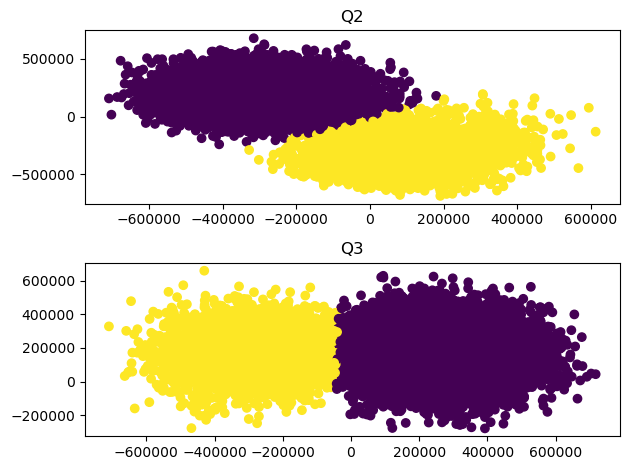

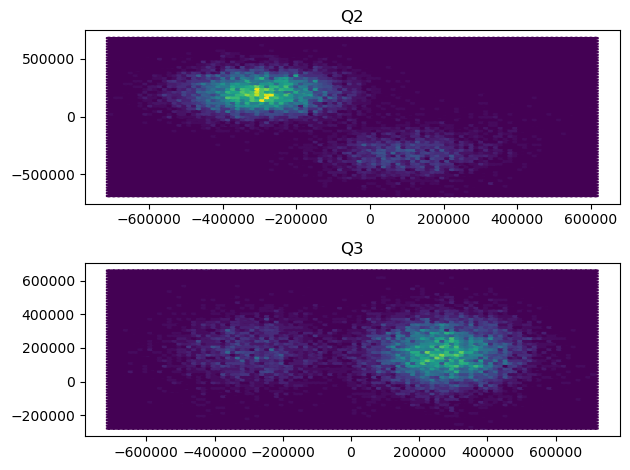

In [7]:
register = ['Q2', 'Q3']
target_amplitude = qchip.gates['Q2X90'].cfg_dict[0]['amp']
pulse_width_interval = np.linspace(1e-9, 100e-9, 10)

gmm_rabi = _rabi.GMMRabi(register, target_amplitude, pulse_width_interval, 
                       channel_configs=channel_config)

gmm_rabi.run_and_report(jm, 1000, qchip)

# CR Tomography

In [80]:
reload(_xr)

<module 'chipcalibration.cross_resonance' from '/home/jpmarceaux/chipcalibration/chipcalibration/cross_resonance.py'>

In [81]:
jobman = _jm.JobManager(fpga_config, channel_config, runner, qchip,
                       gmm_manager=gmm_rabi.gmm_manager)

In [82]:
pulse_width_interval = np.linspace(5e-9, 150e-9, 20)
drive_amp = 0.5

In [83]:
icr = _xr.CrossResonanceTomography('Q3', 'Q2', 
                                    pulse_width_interval, drive_amp, pulse_type='std')

In [109]:
params = [5e7, 1e6, 5e7]

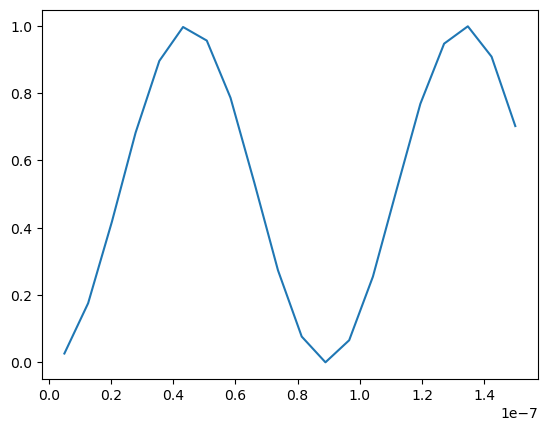

In [110]:
plt.plot(icr.pulse_width_interval, _xr.avg_Y(icr.pulse_width_interval, *params))

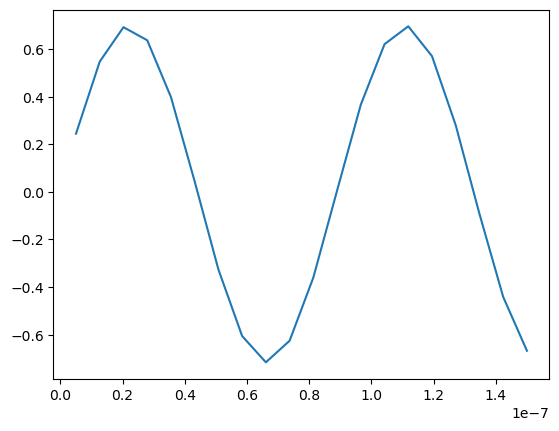

In [111]:
plt.plot(icr.pulse_width_interval, _xr.avg_X(icr.pulse_width_interval, *params))

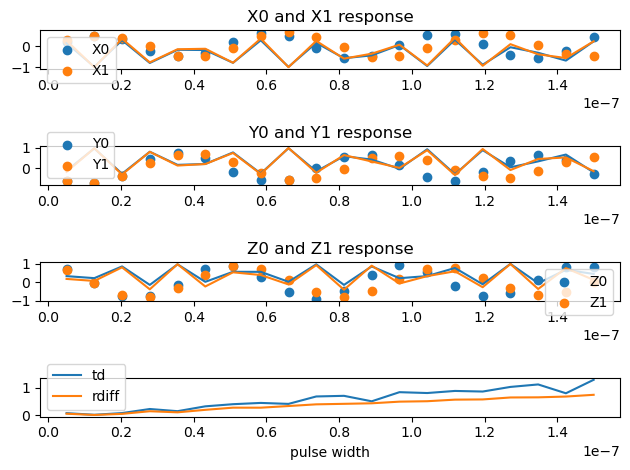

In [84]:
icr.run_and_report(jobman, 1000, qchip)

In [87]:
icr.rates

{'IX': 189891845.6847046,
 'IY': 201696342.87746274,
 'IZ': 206362246.43804544,
 'ZX': -6873702.264384538,
 'ZY': -13283772.40284653,
 'ZZ': 17682912.199835762}

In [88]:
icr.fits

[(array([2.24045159e+08, 1.83018143e+08, 1.88412570e+08]),
  array([[ 1.21642271e+15, -7.33284976e+14, -7.53790465e+14],
         [-7.33284976e+14,  1.93628476e+15, -9.86692202e+14],
         [-7.53790465e+14, -9.86692202e+14,  1.87724104e+15]])),
 (array([1.88679334e+08, 1.96765548e+08, 2.14980115e+08]),
  array([[ 1.58152315e+15, -7.03558644e+14, -7.70208551e+14],
         [-7.03558644e+14,  2.25322531e+15, -1.42664113e+15],
         [-7.70208551e+14, -1.42664113e+15,  2.00161569e+15]]))]